# Dense Neural Network (DNN)

## Import the librairies

In [1]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

## Retrieve data

In [2]:
# Load data

(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data() # many data set are included in keras

print("x_train : ",x_train.shape)
print("y_train : ",y_train.shape)
print("x_test  : ",x_test.shape)
print("y_test  : ",y_test.shape)

x_train :  (60000, 28, 28)
y_train :  (60000,)
x_test  :  (10000, 28, 28)
y_test  :  (10000,)


## Data Normalization

In [3]:
xmax=x_train.max()
x_train = x_train / xmax
x_test  = x_test  / xmax

## Create the model

In [13]:
hidden1     = 100
hidden2     = 100

model = keras.Sequential([
    keras.layers.Input((28,28)),
    keras.layers.Flatten(),
    keras.layers.Dense( hidden1, activation='relu'),
    keras.layers.Dense( hidden2, activation='relu'),
    keras.layers.Dense( 10,      activation='softmax')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 784)               0         
                                                                 
 dense_3 (Dense)             (None, 100)               78500     
                                                                 
 dense_4 (Dense)             (None, 100)               10100     
                                                                 
 dense_5 (Dense)             (None, 10)                1010      
                                                                 
Total params: 89,610
Trainable params: 89,610
Non-trainable params: 0
_________________________________________________________________


keras.layers.Dense( hidden1, activation='relu', name='Layer1') means
a dense neural layer with 100 perceptron, activation functions is relu
the number of parameters is (28x28+1)*100: '100' the number of perceptron, '28x28' the size of the input and '1' for the bias

## Train the model

In [5]:
batch_size  = 512
epochs      =  16

history = model.fit(  x_train, y_train,
                      batch_size      = batch_size,
                      epochs          = epochs,
                      verbose         = 1,
                      validation_data = (x_test, y_test))

Epoch 1/16
118/118 [==============================] - 3s 14ms/step - loss: 0.5806 - accuracy: 0.8420 - val_loss: 0.2540 - val_accuracy: 0.9278
Epoch 2/16
118/118 [==============================] - 1s 10ms/step - loss: 0.2112 - accuracy: 0.9393 - val_loss: 0.1827 - val_accuracy: 0.9460
Epoch 3/16
118/118 [==============================] - 1s 10ms/step - loss: 0.1575 - accuracy: 0.9546 - val_loss: 0.1480 - val_accuracy: 0.9560
Epoch 4/16
118/118 [==============================] - 1s 10ms/step - loss: 0.1264 - accuracy: 0.9633 - val_loss: 0.1275 - val_accuracy: 0.9637
Epoch 5/16
118/118 [==============================] - 1s 11ms/step - loss: 0.1045 - accuracy: 0.9694 - val_loss: 0.1128 - val_accuracy: 0.9669
Epoch 6/16
118/118 [==============================] - 1s 12ms/step - loss: 0.0874 - accuracy: 0.9742 - val_loss: 0.1054 - val_accuracy: 0.9671
Epoch 7/16
118/118 [==============================] - 1s 11ms/step - loss: 0.0756 - accuracy: 0.9778 - val_loss: 0.1000 - val_accuracy: 0.9702

## Evaluate the model

In [6]:
 score = model.evaluate(x_test, y_test, verbose=0)

print('Test loss     :', score[0])
print('Test accuracy :', score[1])

Test loss     : 0.08659161627292633
Test accuracy : 0.9739000201225281


## Plot history

<AxesSubplot:title={'center':'Rate_validation acording the number of epochs'}, xlabel='epochs', ylabel='rate_validity'>

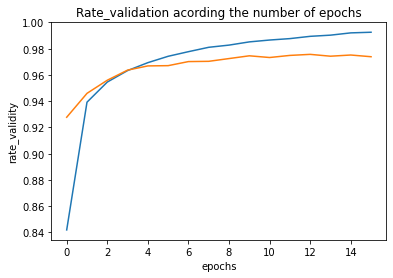

In [7]:
# convert the training history to a dataframe
history_df = pd.DataFrame(history.history)

# use Pandas native plot method
plt.xlabel("epochs")
plt.ylabel("rate_validity")
plt.title("Rate_validation acording the number of epochs")
history_df['accuracy'].plot()
history_df['val_accuracy'].plot()

## Plot the results

313/313 [==============================] - 1s 2ms/step
tf.Tensor(
[[ 966    0    1    1    0    2    2    2    4    2]
 [   0 1116    5    1    0    1    1    2    9    0]
 [   3    0 1012    4    1    0    0    5    6    1]
 [   0    0    3  991    0    1    0    6    4    5]
 [   2    0    8    1  949    0    1    2    2   17]
 [   2    1    0   17    1  857    5    1    6    2]
 [   8    3    4    0    4   16  916    0    7    0]
 [   1    3   11    3    0    0    0 1000    1    9]
 [   3    0    4    6    6    2    2    2  945    4]
 [   2    2    0    5    5    2    0    4    2  987]], shape=(10, 10), dtype=int32)


<AxesSubplot:>

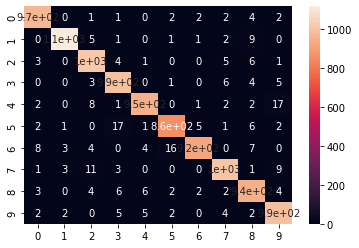

In [8]:
y_sigmoid = model.predict(x_test)
y_pred    = np.argmax(y_sigmoid, axis=-1)

cf_matrix=tf.math.confusion_matrix(y_test, y_pred)
print(cf_matrix)
sns.heatmap(cf_matrix, annot=True)

## Plot some errors

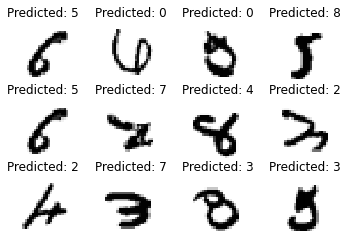

In [14]:
images = x_test.reshape((-1, 28, 28))

# poorly predicted data are recovered 
misclass = (y_test != y_pred)
misclass_images = images[misclass,:,:]
misclass_predicted = y_pred[misclass]

# a sample of these images is selected
select = np.random.randint(misclass_images.shape[0], size=12)

# the images and the (erroneous) predictions associated with these images are displayed
for index, value in enumerate(select):
    plt.subplot(3,4,index+1)
    plt.axis('off')
    plt.imshow(misclass_images[value],cmap=plt.cm.gray_r,interpolation="nearest")
    plt.title('Predicted: {}'.format(misclass_predicted[value]) )

plt.show()